In [0]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import numpy as np
import pandas as pd

In [0]:
# Attempt to re-create dataset

import os
import urllib.request

url = 'http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat'
f = urllib.request.urlopen(url)
dat_file = f.read()

dat_file = str(dat_file)
data = dat_file[370:].split("\\r\\n")

w = ['EVELYN', 'LAURA', 'THERESA', 'BRENDA', 'CHARLOTTE', 'FRANCES', 'ELEANOR', 'PEARL', 'RUTH', 'VERNE', 'MYRNA', 'KATHERINE', 'SYLVIA', 'NORA', 'HELEN', 'DOROTHY', 'OLIVIA', 'FLORA']
c = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']

In [0]:
data

['',
 ' 1 1 1 1 1 1 0 1 1 0 0 0 0 0',
 ' 1 1 1 0 1 1 1 1 0 0 0 0 0 0',
 ' 0 1 1 1 1 1 1 1 1 0 0 0 0 0',
 ' 1 0 1 1 1 1 1 1 0 0 0 0 0 0',
 ' 0 0 1 1 1 0 1 0 0 0 0 0 0 0',
 ' 0 0 1 0 1 1 0 1 0 0 0 0 0 0',
 ' 0 0 0 0 1 1 1 1 0 0 0 0 0 0',
 ' 0 0 0 0 0 1 0 1 1 0 0 0 0 0',
 ' 0 0 0 0 1 0 1 1 1 0 0 0 0 0',
 ' 0 0 0 0 0 0 1 1 1 0 0 1 0 0',
 ' 0 0 0 0 0 0 0 1 1 1 0 1 0 0',
 ' 0 0 0 0 0 0 0 1 1 1 0 1 1 1',
 ' 0 0 0 0 0 0 1 1 1 1 0 1 1 1',
 ' 0 0 0 0 0 1 1 0 1 1 1 1 1 1',
 ' 0 0 0 0 0 0 1 1 0 1 1 1 1 1',
 ' 0 0 0 0 0 0 0 1 1 1 0 1 0 0',
 ' 0 0 0 0 0 0 0 0 1 0 1 0 0 0',
 ' 0 0 0 0 0 0 0 0 1 0 1 0 0 0',
 "'"]

In [0]:
#using online dataset link

def clean_data(w, c, data, n):

    G=nx.generators.empty_graph(14+18,create_using= None)
    G.clear()

    i = 0
    if i<n:
      for i in range(1, n+1):
        a = data[i]
        values = a.split(" ")
        if len(values)>14:
          del values[0]
        thisrow = list(map(int, values))

        for col in range(0,len(thisrow)):
            if thisrow[col]==1 :
                G.add_edge(w[i-1],c[col])
        i+=1
          
    return (G)

In [0]:
#projecting to biadjacency matrix

def projection(B, pv):
    
    G=nx.Graph()
    for v in pv:
        G.add_node(v)
        for cv in B.neighbors(v):
            G.add_edges_from([(v,u) for u in B.neighbors(cv)])
    return G

In [0]:
G = clean_data(w, c, data, 18)
W = projection(G,w)  
C = projection(G,c)

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, W, C))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 8)	1
  (2, 0)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 8)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	1
  :	:
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 6)	1
  (13, 7)	1
  (13, 8)	1
  (13, 9)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 8)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (14, 12)	1
  (14, 13)	1
  (15, 6)	1
  (15, 7)	1
  (15, 9)	1
  (15, 11)	1
  (16, 7)	1
  (16, 10)	1
  (17, 7)	1
  (17, 10)	1


In [0]:
#Using the Code Provided for us
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [0]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w), w))


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [0]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w, weight='weight'), w))


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


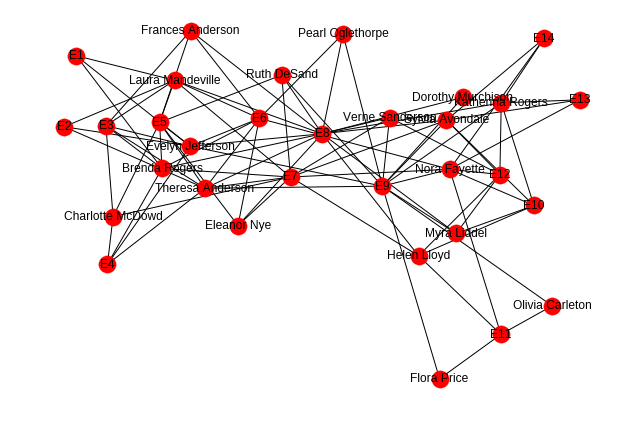

In [0]:
nx.draw(G, with_labels=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


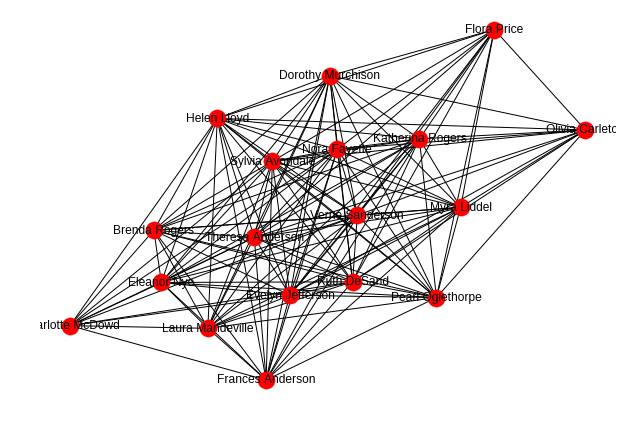

In [0]:
nx.draw(W, with_labels=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


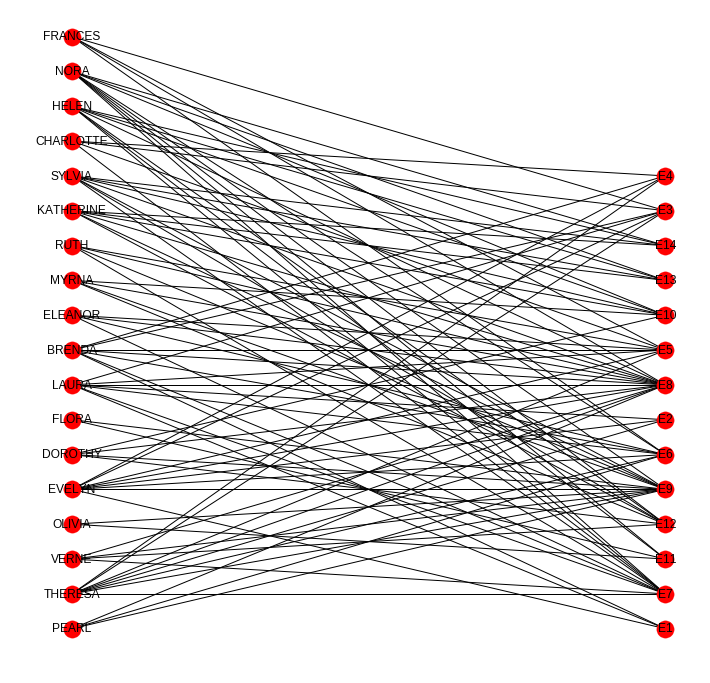

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/smithchad17/data620-group5/master/Week6/davisdata.csv')

#Empty lists for nodes and edges
node1 = []
node2 = []
edges = []

i = 0

#Loop through rows
while i < len(data):
   #Loop through the E# columns
   #If matrix position is a 1, create edge and add to list.
   for j in range(1, len(data.columns)):
      if data.iloc[i,j] != 0:
         node1.append(data.iloc[i,0])
         node2.append(data.columns[j])
         edges.append((data.iloc[i,0], data.columns[j]))
   i+=1
         

G = nx.Graph()

G.add_nodes_from(node1, bipartite=0)
G.add_nodes_from(node2, bipartite=1)
G.add_edges_from(edges)

#Separate by node group
memb, group = nx.bipartite.sets(G)
pos = {}

#Loop over the lists using enumerate to give us a counter.
# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(memb))
pos.update((node, (2, index)) for index, node in enumerate(group))

plt.figure(3, figsize=(12, 12))
nx.draw_networkx(G, pos, with_labels=True)
limits=plt.axis('off')
plt.show()

In [0]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 93
Average degree:   5.8125


In [0]:
nx.diameter(G)

4

In [0]:
a = nx.betweenness_centrality(G, normalized=True, endpoints=True)
betweenness_centrality_df = pd.DataFrame.from_dict(a, orient='index')
betweenness_centrality_df.columns = ['between_centrality']
sorted_centrality_a = betweenness_centrality_df.sort_values(by=['between_centrality'], ascending=False)

In [0]:
b = nx.closeness_centrality(G)
closeness_centrality_df = pd.DataFrame.from_dict(b, orient='index')
closeness_centrality_df.columns = ['closeness_centrality']
sorted_centrality_b = closeness_centrality_df.sort_values(by=['closeness_centrality'], ascending=False)

In [0]:
c = nx.communicability_betweenness_centrality(G)
communicability_betweenness_centrality_df = pd.DataFrame.from_dict(c, orient='index')
communicability_betweenness_centrality_df.columns = ['communicability_betweenness_centrality']
sorted_centrality_c = communicability_betweenness_centrality_df.sort_values(by=['communicability_betweenness_centrality'], ascending=False)

In [0]:
df_merged = sorted_centrality_a.merge(sorted_centrality_b, how='outer', left_index=True, right_index=True)
df_merged2 = df_merged.merge(sorted_centrality_c, how='outer', left_index=True, right_index=True)
df_merged2

,between_centrality,closeness_centrality,communicability_betweenness_centrality
BRENDA,0.106879,0.469697,0.198144
CHARLOTTE,0.072032,0.387500,0.058260
DOROTHY,0.074483,0.442857,0.096196
E1,0.064463,0.369048,0.037909
E10,0.076247,0.397436,0.121213
E11,0.080684,0.378049,0.049108
E12,0.083136,0.407895,0.156079
E13,0.066309,0.378049,0.065155
E14,0.066309,0.378049,0.065155
E2,0.064403,0.369048,0.042298


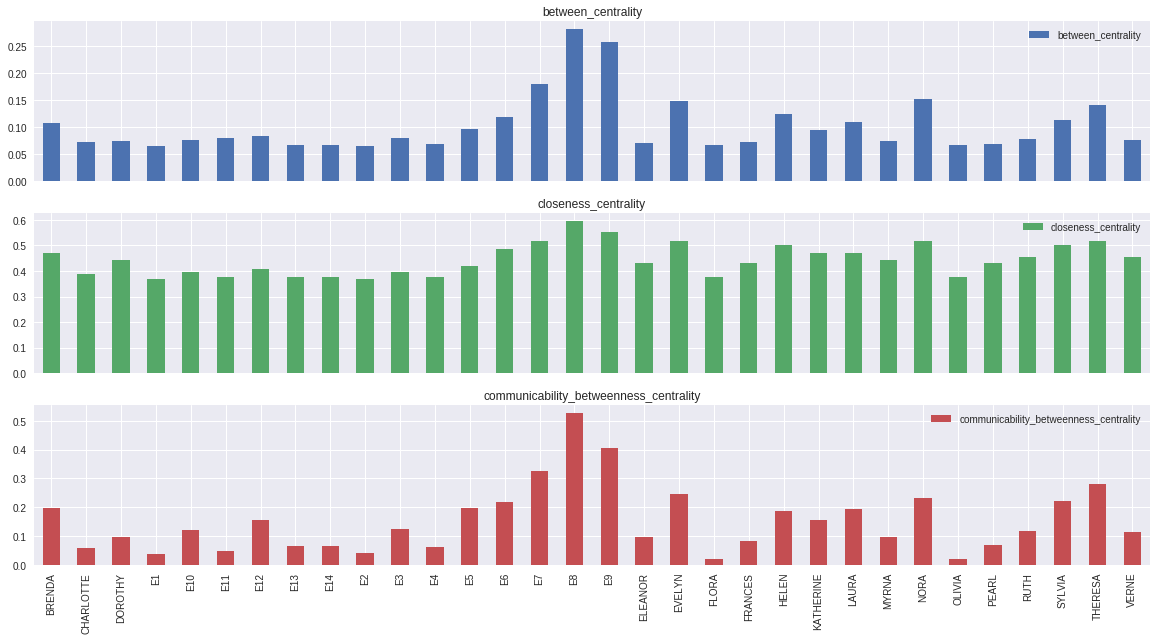

In [0]:
ax = df_merged2.plot.bar(rot=90, subplots=True, figsize=(20,10))

What can you infer about the relationships between (1) the women, and (2) the social events?  

- The women are connected through the social events, but some of these women and some of these events are more crucial to the development and success of this social circle

- Certain women that are central nodes in the relationship and have the highest centrality values are the women most important to the health of the social circle. These women would be Evelyn Jefferson, Theresa Anderson, and Nora Fayette.

- Certain events are central nodes and bring these women closer together. These include E8 and E9.

- Looking at the graph, there appears to be two cliques in the women, one centered around Evelyn Jefferson and Theresa Anderson, and another around Nora Fayette. Certain events (especially E8) contribute to bringing these two cliques closer together.